In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('website-landings.csv')

In [3]:
df.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,20a70111,2024-02-29 01:57:19,0,NaN,direct,NaN
1,20a70111,2024-02-29 13:58:10,0,NaN,direct,NaN
2,58830f30,2024-01-18 13:22:58,0,NaN,direct,NaN
3,58830f30,2024-01-19 16:19:37,0,NaN,direct,NaN
4,58830f30,2024-01-22 13:33:16,0,NaN,direct,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   User Id               1586314 non-null  object
 1   Website Landing Time  1586314 non-null  object
 2   Is Converted          1586314 non-null  int64 
 3   Source                971465 non-null   object
 4   Channel               1586314 non-null  object
 5   Campaign Type         640729 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.6+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the LabelEncoder to the categorical column
le.fit(df['User Id'])

# Convert the categorical column to numeric
df['User Id'] = le.transform(df['User Id'])

print(df)


         User Id Website Landing Time  Is Converted    Source Channel  \
0         120698  2024-02-29 01:57:19             0       NaN  direct   
1         120698  2024-02-29 13:58:10             0       NaN  direct   
2         328276  2024-01-18 13:22:58             0       NaN  direct   
3         328276  2024-01-19 16:19:37             0       NaN  direct   
4         328276  2024-01-22 13:33:16             0       NaN  direct   
...          ...                  ...           ...       ...     ...   
1586309   684834  2024-03-20 00:01:17             0  facebook    paid   
1586310   452299  2024-03-20 00:00:51             0  facebook    paid   
1586311   452298  2024-03-20 00:01:39             0  facebook    paid   
1586312   622313  2024-03-20 00:00:59             0  facebook    paid   
1586313    87856  2024-03-20 00:01:30             0  facebook    paid   

        Campaign Type  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   User Id               1586314 non-null  int64 
 1   Website Landing Time  1586314 non-null  object
 2   Is Converted          1586314 non-null  int64 
 3   Source                971465 non-null   object
 4   Channel               1586314 non-null  object
 5   Campaign Type         640729 non-null   object
dtypes: int64(2), object(4)
memory usage: 72.6+ MB


In [7]:
df['Website Landing Time'] = pd.to_datetime(df['Website Landing Time'])

In [8]:
df.isnull().sum()

User Id                      0
Website Landing Time         0
Is Converted                 0
Source                  614849
Channel                      0
Campaign Type           945585
dtype: int64

In [9]:
df.dtypes

User Id                          int64
Website Landing Time    datetime64[ns]
Is Converted                     int64
Source                          object
Channel                         object
Campaign Type                   object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   User Id               1586314 non-null  int64         
 1   Website Landing Time  1586314 non-null  datetime64[ns]
 2   Is Converted          1586314 non-null  int64         
 3   Source                971465 non-null   object        
 4   Channel               1586314 non-null  object        
 5   Campaign Type         640729 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 72.6+ MB


In [11]:
df.nunique()

User Id                  950404
Website Landing Time    1480471
Is Converted                  2
Source                       54
Channel                       8
Campaign Type                 8
dtype: int64

In [12]:
df.count()

User Id                 1586314
Website Landing Time    1586314
Is Converted            1586314
Source                   971465
Channel                 1586314
Campaign Type            640729
dtype: int64

In [13]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

#print columns
print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['User Id', 'Website Landing Time', 'Is Converted']

we have 3 categorical features: ['Source', 'Channel', 'Campaign Type']


In [14]:
print("categories in 'Sources' variables:  ",end=" ")
print(df["Source"].unique())

categories in 'Sources' variables:   [nan 'google' 'yahoo!' 'pinterest' 'facebook' 'duckduckgo' 'youtube'
 'bing' 'criteo' 'taboola' 'reddit' 'ecosia' 'tiktok' 'instagram'
 'outbrain' 'outlook.com' 'yahoo! mail' 'gmail' 'baidu' 'aol' 'hi5'
 'infospace' 'twitter' 'aol mail' 'snapchat' 'qq mail' 'yahoo! images'
 'seznam mail' 'earthlink' 'qwant' 't-online' 'optus zoo' 'google images'
 'startsiden' 'bigpond' 'naver' 'linkedin' 'quora' 'atlas' 'yandex'
 'myheritage' 'tumblr' 'mail.ru' 'skype' 'daum' 'odnoklassniki'
 'google news' 'zoho' 'lilo' 'amazon' 'seznam' 'kvasir' 'hacker news'
 'coccoc' 'startpagina']


In [15]:
print("categories in 'Channel' variables:  ",end=" ")
print(df["Channel"].unique())

categories in 'Channel' variables:   ['direct' 'organic search' 'referral' 'email' 'display' 'social' 'paid'
 'paid search']


In [16]:
print("categories in 'Champaign Type' variables:  ",end=" ")
print(df["Campaign Type"].unique())

categories in 'Champaign Type' variables:   [nan 'Shopping' 'Search & content' 'Cross-network' 'Audience'
 'Search Network' 'Performance max' 'YouTube' 'Display Network']


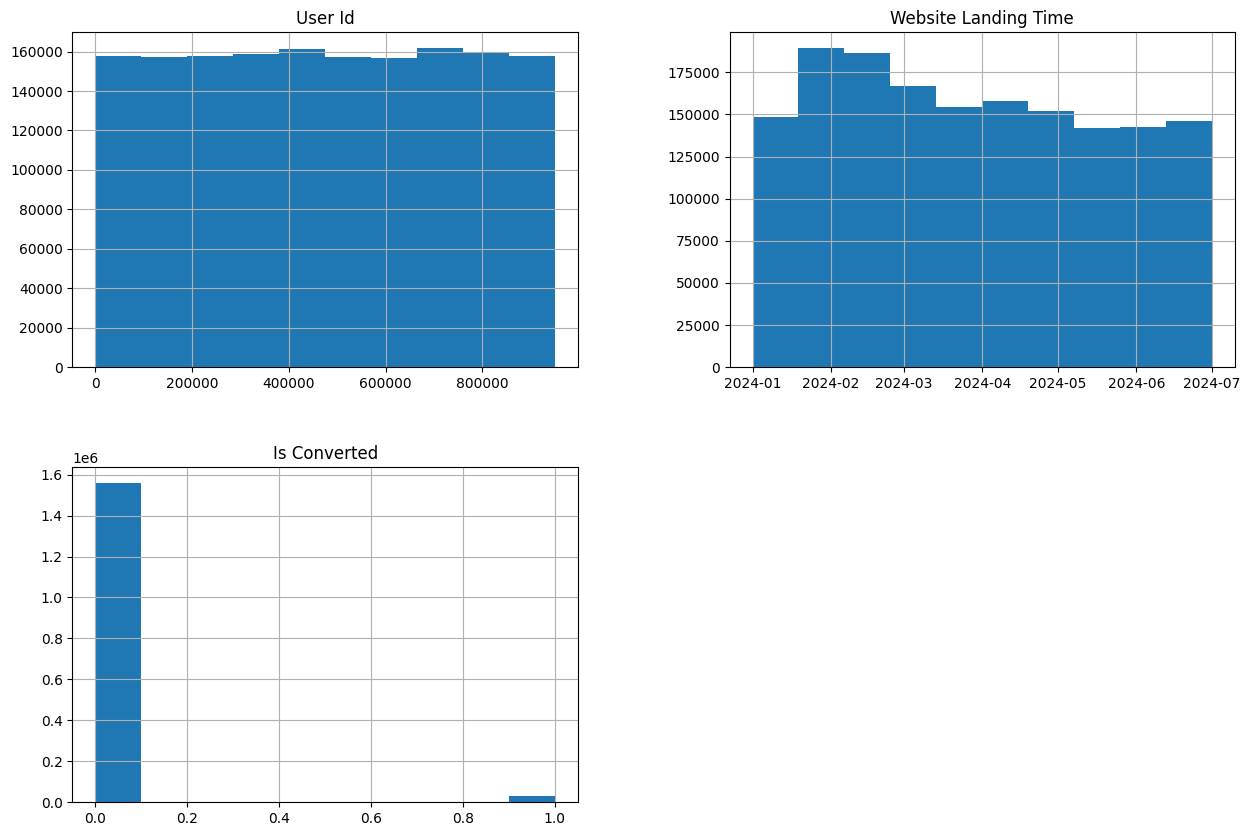

In [17]:
df.hist(figsize=(15, 10))
plt.show()

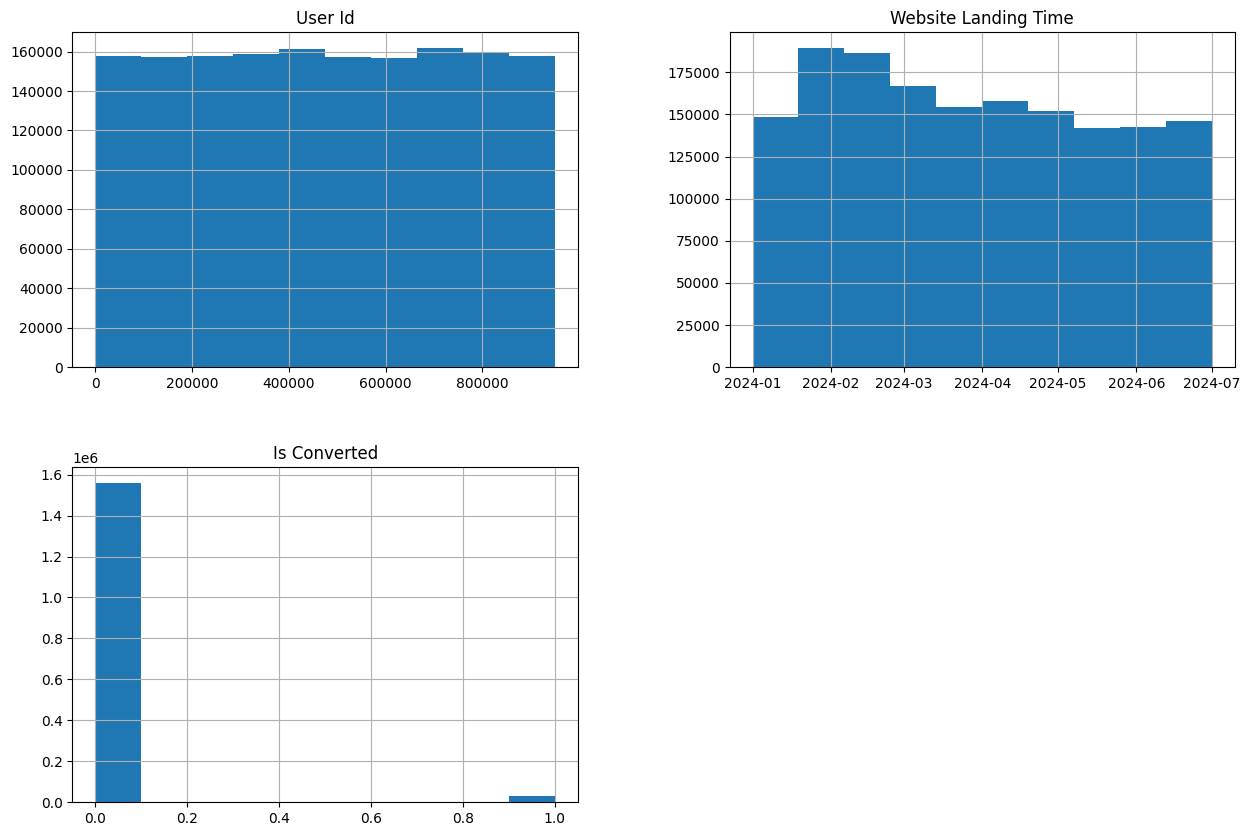

In [18]:
df.hist(figsize=(15, 10))
plt.show()

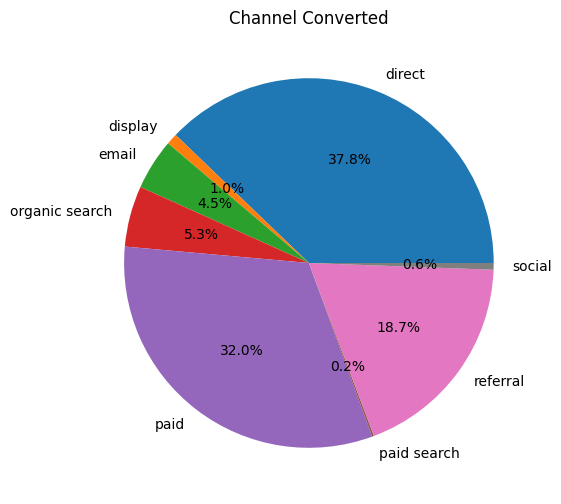

In [19]:
# Group the data by category and calculate the total sales revenue for each category
category_sales = df.groupby('Channel')['Is Converted'].sum().reset_index()

# Create a pie chart of the category sales
plt.figure(figsize=(8,6))
plt.pie(category_sales['Is Converted'], labels=category_sales['Channel'], autopct='%1.1f%%')
plt.title('Channel Converted')
plt.show()

In [20]:
grouped_df = df.groupby('Campaign Type')['User Id'].count()
grouped_df


Campaign Type
Audience             10945
Cross-network       385470
Display Network         25
Performance max       6970
Search & content     89544
Search Network       90721
Shopping             56052
YouTube               1002
Name: User Id, dtype: int64

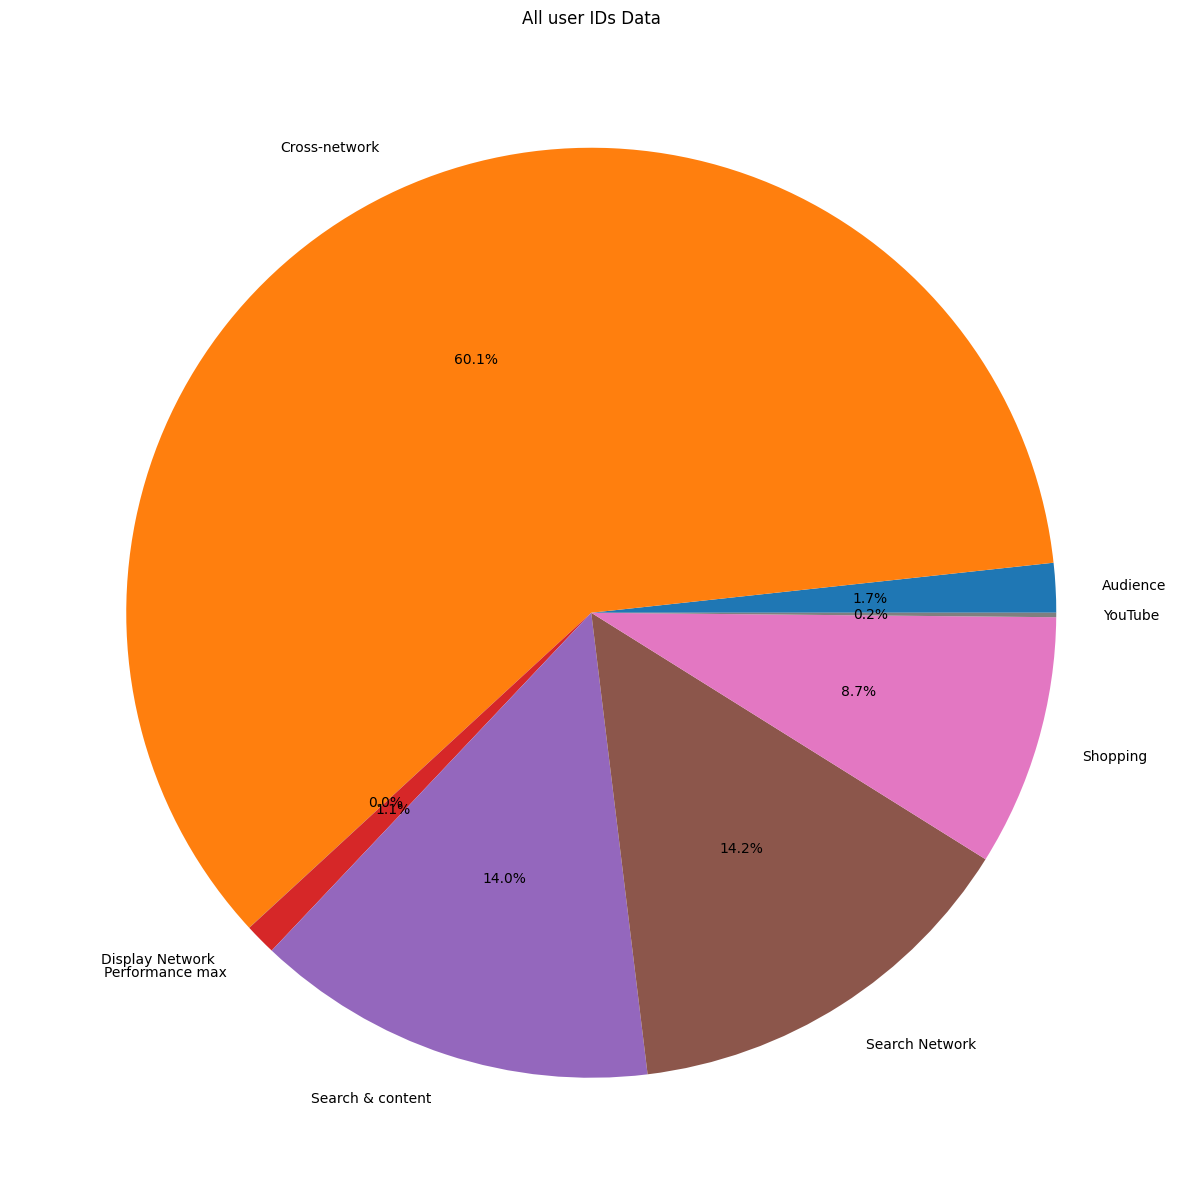

In [30]:
# Group the data by category and calculate the total sales revenue for each category
category_sales = df.groupby('Campaign Type')['User Id'].sum().reset_index()

# Create a pie chart of the category sales
plt.figure(figsize=(15,35))
plt.pie(category_sales['User Id'], labels=category_sales['Campaign Type'], autopct='%1.1f%%')
plt.title('All user IDs Data')
plt.show()

In [36]:
grouped_df = df.groupby(['Campaign Type','Is Converted'])['User Id'].count()
grouped_df

Campaign Type     Is Converted
Audience          0                10805
                  1                  140
Cross-network     0               379545
                  1                 5925
Display Network   0                   25
Performance max   0                 6881
                  1                   89
Search & content  0                88528
                  1                 1016
Search Network    0                89245
                  1                 1476
Shopping          0                55409
                  1                  643
YouTube           0                  989
                  1                   13
Name: User Id, dtype: int64

In [37]:
grouped_df = df.groupby(['Campaign Type','Channel','Is Converted'])['User Id'].count()
grouped_df

Campaign Type     Channel  Is Converted
Audience          paid     0                10805
                           1                  140
Cross-network     paid     0               379545
                           1                 5925
Display Network   paid     0                   25
Performance max   paid     0                 6881
                           1                   89
Search & content  paid     0                88528
                           1                 1016
Search Network    paid     0                89245
                           1                 1476
Shopping          paid     0                55409
                           1                  643
YouTube           paid     0                  989
                           1                   13
Name: User Id, dtype: int64

In [43]:
grouped_df = df.groupby(['Campaign Type','Is Converted'])['Source'].count()
grouped_df

Campaign Type     Is Converted
Audience          0                10805
                  1                  140
Cross-network     0               379545
                  1                 5925
Display Network   0                   25
Performance max   0                 6881
                  1                   89
Search & content  0                88528
                  1                 1016
Search Network    0                89245
                  1                 1476
Shopping          0                55409
                  1                  643
YouTube           0                  989
                  1                   13
Name: Source, dtype: int64

C:\Users\nani8\AppData\Local\Temp\ipykernel_13476\1504987978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Campaign Type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


ValueError: 'label' must be of length 'x'

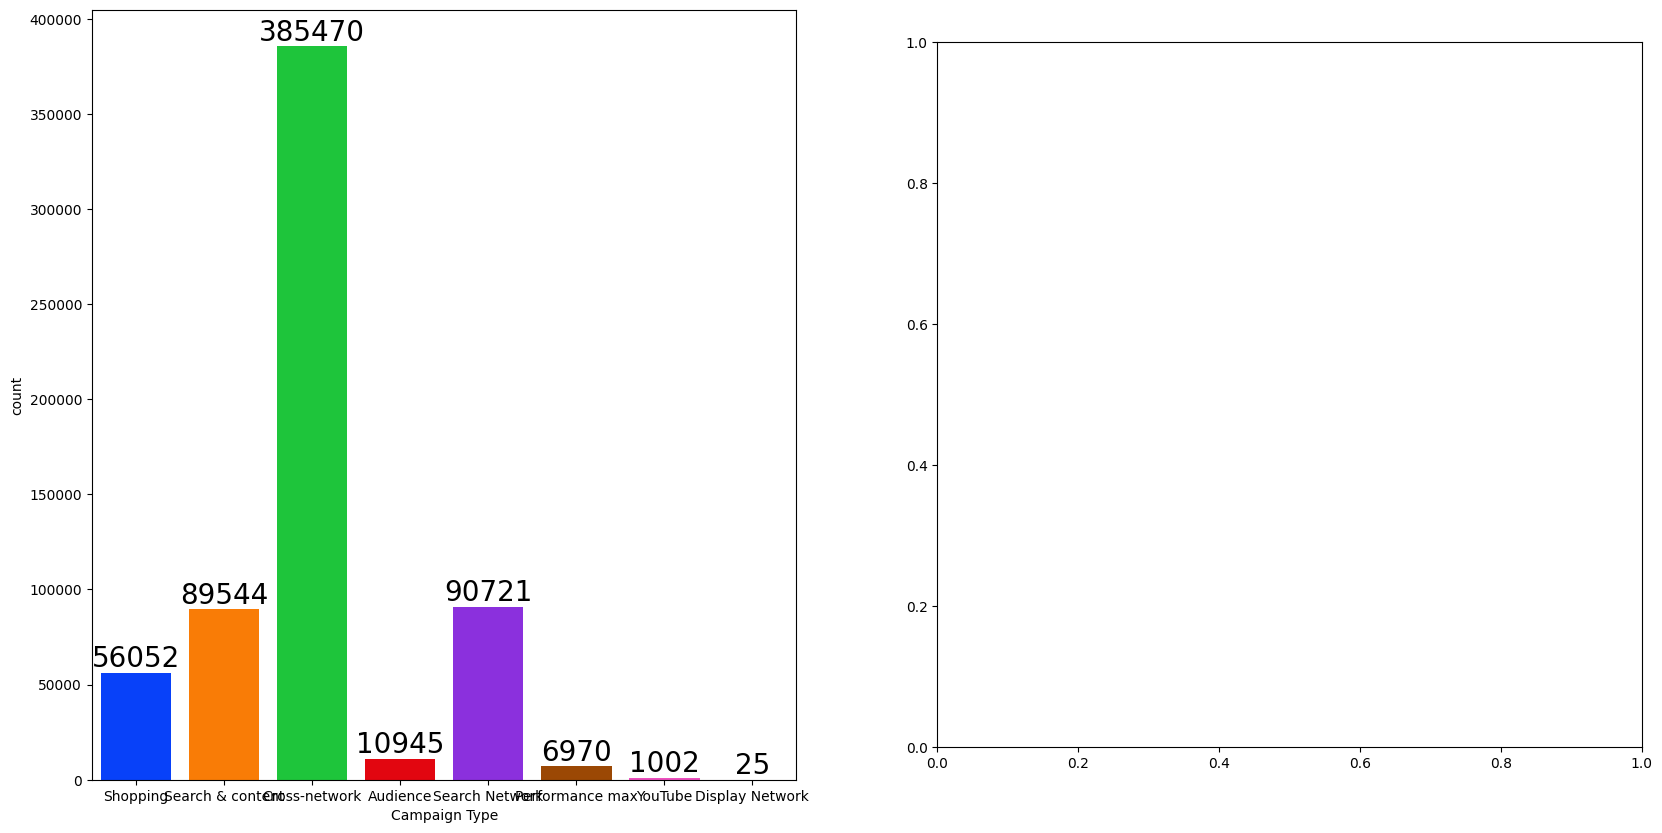

In [18]:
labels = df['Campaign Type'].unique()
counts = df['Campaign Type'].value_counts()

f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['Campaign Type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(counts,labels=labels,explode=[0.1 if i==0 else 0 for i in range(len(labels))],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d' if i%2==0 else '#ff8000' for i in range(len(labels))])
plt.show()

C:\Users\nani8\AppData\Local\Temp\ipykernel_13476\784979745.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Campaign Type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


ValueError: 'label' must be of length 'x'

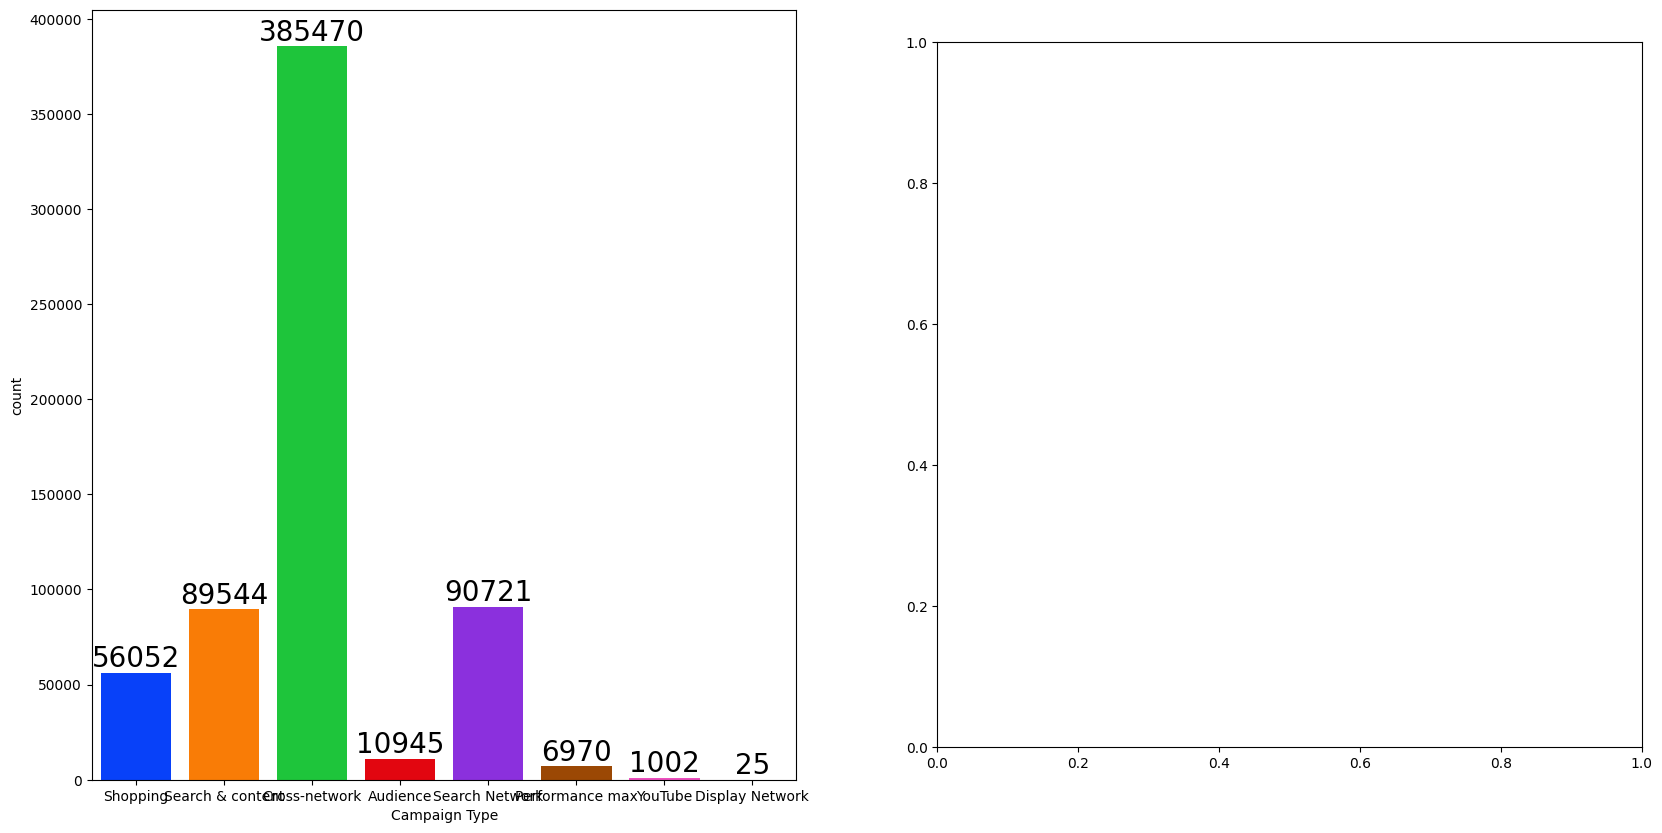

In [19]:
# Assuming you have a DataFrame df with a column 'label' and 8 unique labels
labels = df['Campaign Type'].unique()
counts = df['Campaign Type'].value_counts()

f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['Campaign Type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)

plt.show()

In [73]:
labels = df['Campaign Type'].unique()


In [78]:
len(labels)

9